5.	Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. 
Perform following tasks: 
1. Pre-process the dataset. 
2. Identify outliers. 
3. Check the correlation.
 4. Implement linear regression and random forest regression models. 
 5. Evaluate the models and compare their respective scores like R2, RMSE, etc. Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset (ML)

In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [6]:
df=pd.read_csv("D:/BE/Practical/ML/ML3/uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [7]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
df.drop(['key','pickup_datetime'],axis=1,inplace=True)


In [9]:
df.dtypes

Unnamed: 0             int64
fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
df.dropna(inplace=True)

<Axes: ylabel='fare_amount'>

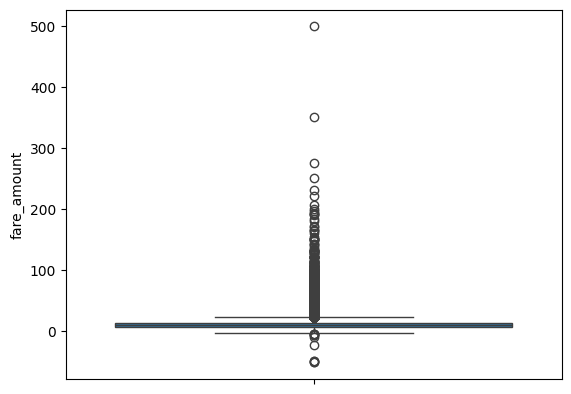

In [11]:
sns.boxplot(df['fare_amount'])

In [12]:
low=df['fare_amount'].quantile(0.05)
high=df['fare_amount'].quantile(0.95)
df=df[(df['fare_amount']>low) & (df['fare_amount']<high)]

<Axes: ylabel='fare_amount'>

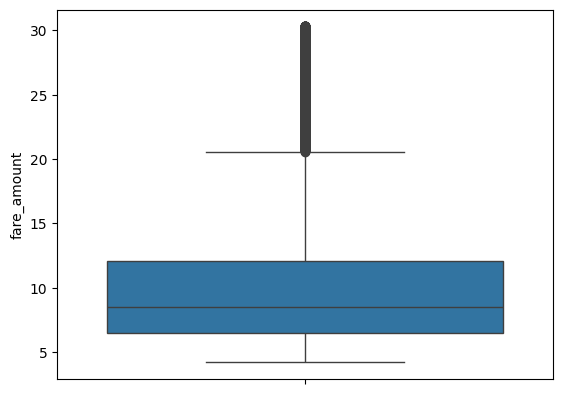

In [13]:
sns.boxplot(df['fare_amount'])

<Axes: >

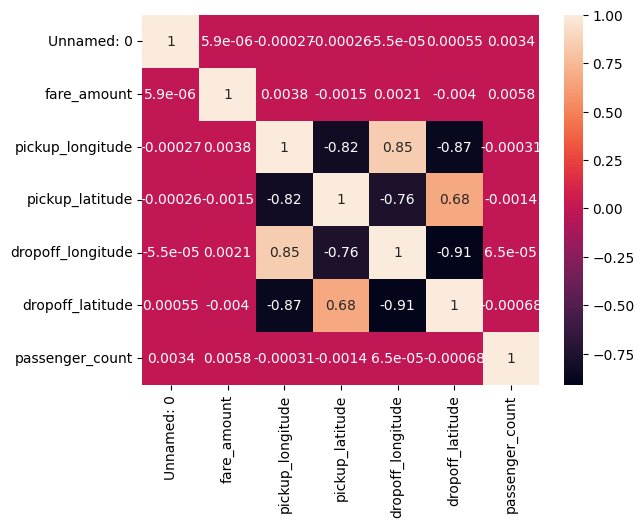

In [14]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score ,mean_absolute_error

In [16]:
X=df.drop(['fare_amount'],axis=1)
y=df['fare_amount']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [18]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [19]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [20]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE->",RMSE)
R2=r2_score(y_test,y_pred)
print("R2_score->",R2)
MAE=mean_absolute_error(y_test,y_pred)
print("MAE->",MAE)

RMSE-> 5.133423532339454
R2_score-> -0.00018581908495840516
MAE-> 3.891823809042502


In [21]:
from sklearn.ensemble import RandomForestRegressor



In [22]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [23]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE->",RMSE)
R2=r2_score(y_test,y_pred)
print("R2->",R2)
MAE=mean_absolute_error(y_test,y_pred)
print("MAE->",MAE)


RMSE-> 2.6511501261034356
R2-> 0.7332311352142262
MAE-> 1.7768297791869552
